# "Monte Carlo Integration in Python"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/monte_logo.gif

# 몬테 카를로 적분(Monte Carlo Integration)

# Problem 

**Find $\int_0^1 (x^5 + sin(4\pi x))\,dx$.**

## Solution I

$\int_0^1 (x^5 + sin(4\pi x))\,dx = \left[\cfrac{1}{6} x^6-\cfrac{1}{4\pi}cos(4\pi x)\right]_0^1 = \cfrac{1}{6} - \cfrac{1}{4\pi} + \cfrac{1}{4\pi} = \cfrac{1}{6}$

## Solution II - Monte Carlo Integration in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

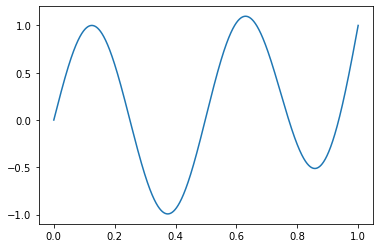

In [60]:
def function(x):
    return x**5 + np.sin(4*np.pi*x)

x = np.linspace(0, 1, 10000)
y = [function(x) for x in x]
plt.plot(x, y)
bottom, top = plt.ylim() #그래프에서 최솟값, 최댓값

![](image/monte_1.png)

![](image/monte_2.png)

In [61]:
def function(x): #함수 정의
    return x**5 + np.sin(4*np.pi*x)


N = int(1e+5)  # Random Sampling 시행 횟수
W = 1  # 사각형의 가로 길이 정의
H = top - bottom #최댓값 - 최솟값, 꼭 최댓값과 최솟값으로 할 필요는 없음.


X = np.random.random(N)   ### 각 점의 x 좌표 랜덤 샘플링
Y = H*np.random.random(N) ### 각 점의 y 좌표 랜덤 샘플링

F = function(X) ### 각 랜덤 샘플링에 대한 f(x)를 계산
in_out = Y < F  ### y와 f(x) 값 비교
    
A = H * W * np.sum(in_out) / N ### 영역 S의 넓이
print("A = ", A)

A =  0.9711591930996334


In [28]:
max(x**2 + np.sin(np.pi*x))

1.3146653940470887